## Training Neural Network

In [8]:
import numpy as np

def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))

def dfunc(f, x):
    #print('calcualte dfunc')
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        #print(idx)
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax_function(a2)
        return y
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()

In [10]:
net = ANN(input_size=4, hidden_size=5, output_size=3)

In [11]:
x = iris.data

In [12]:
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

## Batch Gradient Descent

In [13]:
import time
epochs = 3000
lr     = 0.01
a = time.process_time()

train_loss = []
for i in range(epochs):         
    grad = net.numerical_gradient(x,y)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x, y)
    train_loss.append(loss)
time.process_time() - a

12.53125

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Training Loss')

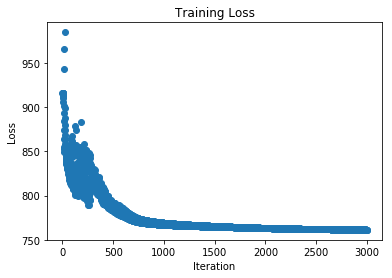

In [14]:
%pylab inline
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

### Jupyter notebook magic
- https://ethanww.github.io/2017/05/08/jupyter%E9%AD%94%E6%B3%95%E5%91%BD%E4%BB%A4/

## Stochastic Gradient Descent

In [15]:
def cross_entropy_err(y_hat, y):
    y      = y.reshape(1, y.size)
    y_hat  = y_hat.reshape(1, y_hat.size)
    batch_size = y_hat.shape[0]
    return -np.sum(y * np.log(y_hat)) / batch_size

In [16]:
import numpy as np
net = ANN(input_size=4, hidden_size=5, output_size=3)

epochs      = 3000
lr          = 0.01
batch_size = 30

t0 = time.perf_counter()
train_loss = []
for i in range(epochs): 
    idx = np.random.choice(iris.data.shape[0], batch_size)
    x_batch   = iris.data[idx]
    y_batch   = y[idx]
    grad = net.numerical_gradient(x_batch,y_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x_batch, y_batch)
    train_loss.append(loss)
time.perf_counter() - t0

8.654293326999777

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Training Loss')

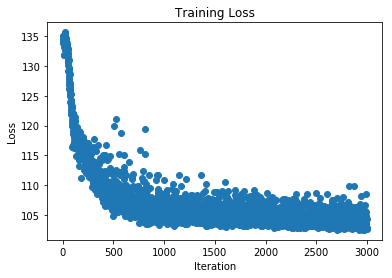

In [17]:
%pylab inline
import matplotlib.pyplot as plt
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

## Backward Propogation
- https://www.wolframalpha.com/input/?i=derivative+1%2Fx

In [43]:
class People:
    def __init__(self, name):
        self.name = name
        
a = People('John')

In [44]:
class Relu:
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        self.cache = (x <=0)
        out = np.maximum(0,x)
        return out

    def backward(self, dout):
        dout[self.cache] = 0
        dx = dout
        return dx

In [45]:
a = Relu()
print(a.cache)

None


In [46]:
ary = numpy.array([-1,1,2])
a.forward(ary)

array([0, 1, 2])

In [47]:
print(a.cache)

[ True False False]


In [48]:
out = numpy.array([2,2,2])
a.backward(out)

array([0, 2, 2])

In [49]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1/ (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        y  = self.out
        dx = dout * y * (1-y)
        return dx

In [50]:
s = Sigmoid()
print(s.out)

None


In [51]:
ary = numpy.array([-1,1,2])
s.forward(ary)

array([0.26894142, 0.73105858, 0.88079708])

In [52]:
print(s.out)

[0.26894142 0.73105858 0.88079708]


In [53]:
out = numpy.array([2,2,2])
s.backward(out)

array([0.39322387, 0.39322387, 0.20998717])

In [54]:
2 * 0.26894142 * (1- 0.26894142)

0.39322386521676717

In [55]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(self.x, self.W) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout)
        return dx


In [56]:
def cross_entropy_err(y_hat, y):
    y      = y.reshape(1, y.size)
    y_hat  = y_hat.reshape(1, y_hat.size)
    batch_size = y_hat.shape[0]
    return -np.sum(y * np.log(y_hat)) / batch_size

In [57]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y_hat = None 
        self.y = None 

    def forward(self, x, y):
        self.y = y
        self.y_hat = softmax_function(x)
        self.loss = cross_entropy_err(self.y_hat, self.y)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.y.shape[0]
        dx = (self.y_hat - self.y) / batch_size
        return dx

In [58]:
def softmax_function(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [59]:
import numpy as np
from collections import OrderedDict

class ANN:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Sigmoid1'] = Sigmoid()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return self.lastLayer.forward(y_hat, y)
  
    def gradient(self, x, y):
        # forward
        self.loss(x, y)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

In [60]:

from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [61]:
import random
import time

epochs     = 3000
lr         = 0.01
batch_size = 30

net = ANN(input_size=4, hidden_size=5, output_size=3)

t0 = time.perf_counter()
train_loss = []
for i in range(epochs): 
    idx = np.random.choice(iris.data.shape[0], batch_size)
    x_batch   = iris.data[idx]
    y_batch   = y[idx]
    grad = net.gradient(x_batch,y_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] -= lr * grad[key]
    loss = net.loss(x_batch, y_batch)
    train_loss.append(loss)
    
time.perf_counter() - t0

0.4989196799997444

Text(0.5, 1.0, 'Training Loss')

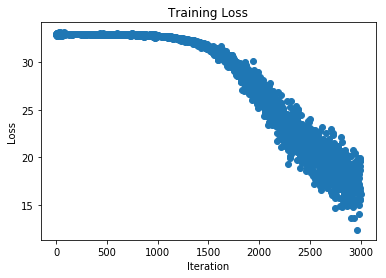

In [62]:
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

In [66]:
predicted = numpy.argmax(net.predict(iris.data), axis = 1)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, predicted)

0.7933333333333333

In [68]:
import random
import time

epochs     = 10000
lr         = 0.01
batch_size = 30

net = ANN(input_size=4, hidden_size=5, output_size=3)

t0 = time.perf_counter()
train_loss = []
for i in range(epochs): 
    idx = np.random.choice(iris.data.shape[0], batch_size)
    x_batch   = iris.data[idx]
    y_batch   = y[idx]
    grad = net.gradient(x_batch,y_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] -= lr * grad[key]
    loss = net.loss(x_batch, y_batch)
    train_loss.append(loss)
    
time.perf_counter() - t0

1.5826904320001631

Text(0.5, 1.0, 'Training Loss')

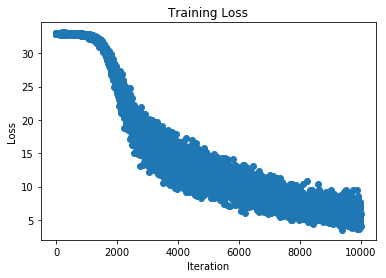

In [69]:
plt.scatter(range(0,10000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

In [70]:
predicted = numpy.argmax(net.predict(iris.data), axis = 1)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, predicted)

0.98

## Using Sklearn To Build ANN

In [72]:
from sklearn.datasets import load_digits
digits = load_digits()

In [73]:
print(dir(digits))

['DESCR', 'data', 'images', 'target', 'target_names']


In [74]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [75]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [76]:
digits.data.shape

(1797, 64)

In [78]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [81]:
img = digits.data[0].reshape((8,8))
img

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

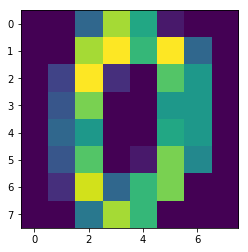

In [82]:
from matplotlib import pyplot as plt
plt.imshow(img)

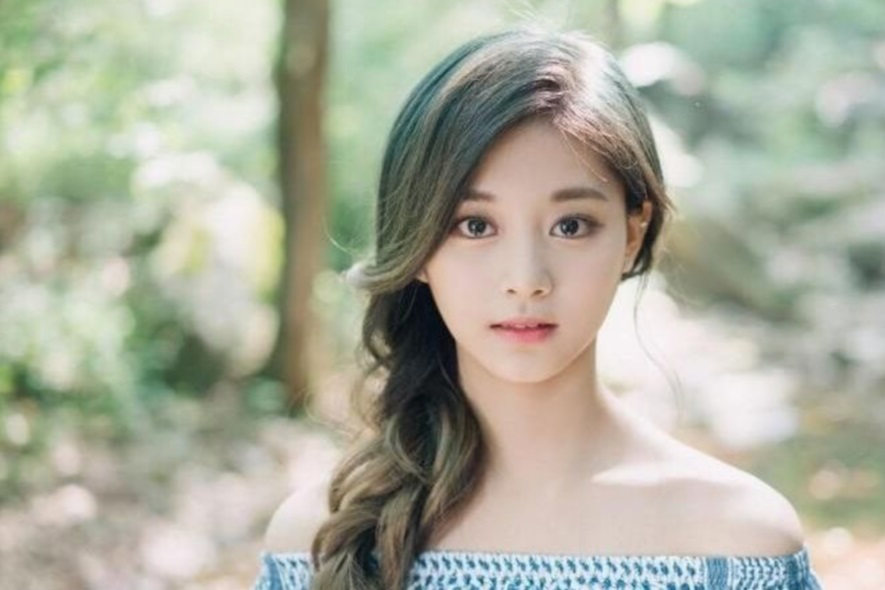

In [84]:
from PIL import Image
im = Image.open('C:/Users/User/Desktop/13_img_885_590.jpg')
im

In [87]:
img = numpy.array(im)
img.shape

(590, 885, 3)

In [88]:
digits.data.shape

(1797, 64)

In [90]:
digits.target.shape

(1797,)

In [89]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

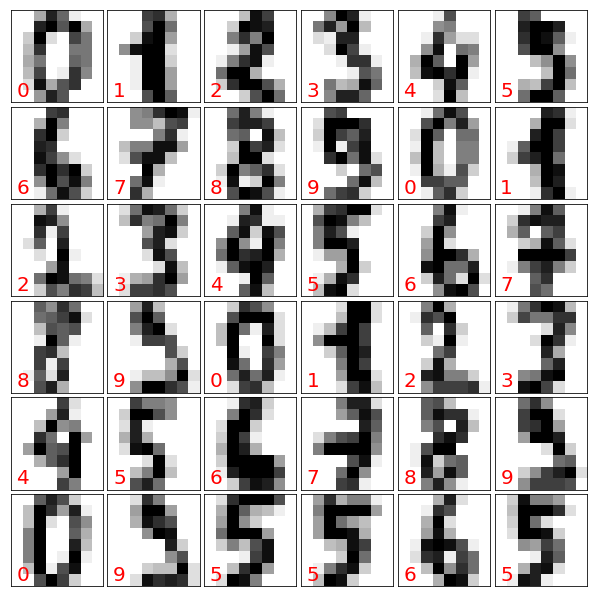

In [91]:
# 畫布大小 8 * 8
fig = plt.figure(figsize = (8,8))

# 圖與圖的間距
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 取樣36 張圖
for i in range(36):
    # 每張 6 * 6 的大小
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    # 繪製灰階圖
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    # 於左下標示紅色大小為20數字
    ax.text(0, 7, str(digits.target[i]), color="red", fontsize = 20)

### Starndard Scaler

In [210]:
a = numpy.array([50,60,70,80,90])
a.mean(), a.std()

(70.0, 14.142135623730951)

In [211]:
(a - a.mean()) / a.std()

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [212]:
b = a.reshape((5,1))
b

array([[50],
       [60],
       [70],
       [80],
       [90]])

In [213]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(b)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

In [214]:
sc.fit(b)       # 產生結構
sc.mean_, sc.var_ ** (1/2)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(array([70.]), array([14.14213562]))

In [215]:
sc.transform(b) # 轉換資料

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

In [216]:
sc.fit_transform(b) #產生結構也轉換資料

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

In [217]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(digits.data)

In [218]:
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [113]:
from sklearn.neural_network import MLPClassifier
?MLPClassifier


- epoch: 1000
- solver: stochastic gradient descent
- input: 64 => hidden1(relu): 30 => hidden2(relu): 30 => hidden3(relu): 30 => output(softmax): 10

In [123]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), 
                    activation='relu', 
                    max_iter = 1000,
                    solver='sgd',
                    learning_rate='constant',
                    learning_rate_init=0.001)

mlp.fit(X_scaled,digits.target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [124]:
predicted = mlp.predict(X_scaled)
predicted

array([0, 1, 2, ..., 8, 9, 8])

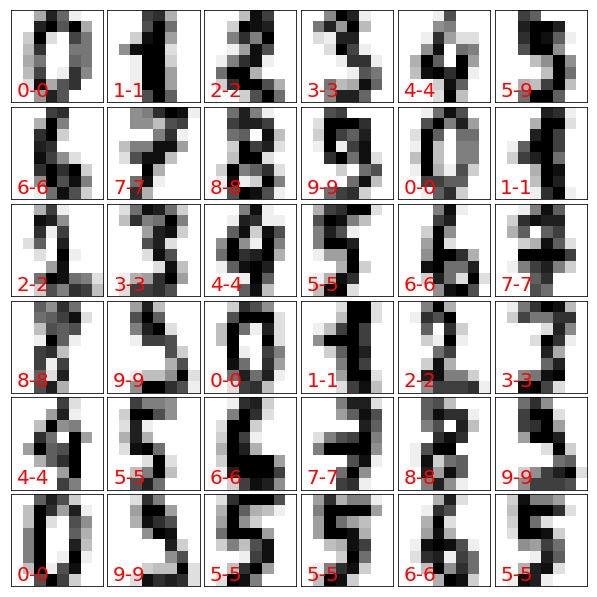

In [125]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str('{}-{}'.format(digits.target[i],predicted[i])), color="red", fontsize = 20)

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target,predicted)

0.9972175848636616

In [128]:
import requests
from PIL import Image
res = requests.get('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/4.bmp')
with open('4.bmp', 'wb') as f:
    f.write(res.content)
img = Image.open('4.bmp')
img

In [131]:
im = numpy.array(img)

In [132]:
im = 15- im

In [136]:
im

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15, 15,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0, 15,  0,  0],
       [ 0,  0, 15,  0,  0, 15,  0,  0],
       [ 0, 15, 15,  0,  0, 15,  0,  0],
       [ 0, 15, 15, 15, 15, 15, 15,  0],
       [ 0,  0,  0,  0,  0, 15,  0,  0],
       [ 0,  0,  0,  0,  0, 15,  0,  0]], dtype=uint8)

In [134]:
im.shape

(8, 8)

In [137]:
im = im.reshape((1,64))

In [138]:
im

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 15, 15,  0,  0,  0,  0,
         0,  0, 15,  0,  0, 15,  0,  0,  0,  0, 15,  0,  0, 15,  0,  0,
         0, 15, 15,  0,  0, 15,  0,  0,  0, 15, 15, 15, 15, 15, 15,  0,
         0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0, 15,  0,  0]],
      dtype=uint8)

In [139]:
im.shape

(1, 64)

In [141]:
sc.mean_

array([0.00000000e+00, 3.03839733e-01, 5.20478575e+00, 1.18358375e+01,
       1.18480801e+01, 5.78185865e+00, 1.36227045e+00, 1.29660545e-01,
       5.56483027e-03, 1.99387869e+00, 1.03823038e+01, 1.19794101e+01,
       1.02793545e+01, 8.17584864e+00, 1.84641068e+00, 1.07957707e-01,
       2.78241514e-03, 2.60155815e+00, 9.90317195e+00, 6.99276572e+00,
       7.09794101e+00, 7.80634391e+00, 1.78853645e+00, 5.00834725e-02,
       1.11296605e-03, 2.46967168e+00, 9.09126322e+00, 8.82136895e+00,
       9.92710072e+00, 7.55147468e+00, 2.31775181e+00, 2.22593211e-03,
       0.00000000e+00, 2.33945465e+00, 7.66722315e+00, 9.07178631e+00,
       1.03016138e+01, 8.74401781e+00, 2.90929327e+00, 0.00000000e+00,
       8.90372844e-03, 1.58375070e+00, 6.88146912e+00, 7.22815804e+00,
       7.67223150e+00, 8.23650529e+00, 3.45631608e+00, 2.72676683e-02,
       7.23427935e-03, 7.04507513e-01, 7.50695604e+00, 9.53923205e+00,
       9.41624930e+00, 8.75848637e+00, 3.72509738e+00, 2.06455203e-01,
      

In [142]:
sc.var_

array([0.00000000e+00, 8.22539514e-01, 2.25957923e+01, 1.80426111e+01,
       1.83714668e+01, 3.20904221e+01, 1.10546255e+01, 1.07556433e+00,
       8.87276110e-03, 1.02097566e+01, 2.93758249e+01, 1.58120413e+01,
       2.28613044e+01, 3.66179365e+01, 1.28545405e+01, 6.85061884e-01,
       3.88763936e-03, 1.27828134e+01, 3.23668069e+01, 3.36521458e+01,
       3.81183987e+01, 3.83854244e+01, 1.06208369e+01, 1.92260705e-01,
       1.11172736e-03, 9.89515699e+00, 3.83199960e+01, 3.45896825e+01,
       3.78271843e+01, 3.44677176e+01, 1.35823949e+01, 2.22097734e-03,
       0.00000000e+00, 1.21062508e+01, 3.99794098e+01, 3.92708623e+01,
       3.51867141e+01, 3.44453245e+01, 1.25054061e+01, 0.00000000e+00,
       2.10670787e-02, 8.88628020e+00, 4.27210645e+01, 4.14682555e+01,
       3.91596797e+01, 3.24209712e+01, 1.87467005e+01, 9.44150719e-02,
       4.16838922e-02, 3.04735308e+00, 3.18426060e+01, 2.73057786e+01,
       2.80960743e+01, 3.63545816e+01, 2.41870885e+01, 9.68505910e-01,
      

In [146]:
raw = sc.transform(im)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [148]:
mlp.predict(raw)

array([4])

In [264]:
from PIL import Image
img = Image.open('C:/Users/User/Desktop/4.jpg')

In [265]:
img = img.convert('L').resize((8,8))

In [266]:
im = numpy.array(img)
im.shape

(8, 8)

In [267]:
im

array([[211, 212, 225, 217, 211, 186, 209, 213],
       [208, 206, 225,  14,  16,  18, 196, 212],
       [212, 206,  15, 139,  14,  16, 200, 210],
       [221,  30, 207, 208,  28,  15, 202, 213],
       [ 13,  23,  10,  13,  13,  11,  15, 212],
       [212, 208, 211, 207,  23,  17, 200, 211],
       [213, 210, 218, 216,  14,  20, 222, 208],
       [211, 211, 210, 210, 210, 210, 205, 218]], dtype=uint8)

In [268]:
im = 255 - im
im

array([[ 44,  43,  30,  38,  44,  69,  46,  42],
       [ 47,  49,  30, 241, 239, 237,  59,  43],
       [ 43,  49, 240, 116, 241, 239,  55,  45],
       [ 34, 225,  48,  47, 227, 240,  53,  42],
       [242, 232, 245, 242, 242, 244, 240,  43],
       [ 43,  47,  44,  48, 232, 238,  55,  44],
       [ 42,  45,  37,  39, 241, 235,  33,  47],
       [ 44,  44,  45,  45,  45,  45,  50,  37]], dtype=uint8)

In [269]:
im[im < 100] = 0

In [270]:
im

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 241, 239, 237,   0,   0],
       [  0,   0, 240, 116, 241, 239,   0,   0],
       [  0, 225,   0,   0, 227, 240,   0,   0],
       [242, 232, 245, 242, 242, 244, 240,   0],
       [  0,   0,   0,   0, 232, 238,   0,   0],
       [  0,   0,   0,   0, 241, 235,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [271]:
im2 = ((im / 255) * 16).astype(int)

In [272]:
im2 = im2.reshape((1,64))

In [273]:
raw = sc.transform(im2)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [274]:
mlp.predict(raw)

array([4])

## EMNIST
- https://www.nist.gov/node/1298471/emnist-dataset

## 小任務
- 請使用sklearn 的 MLPclassifier 建立 iris 預測模型,並計算accuracy

In [149]:
from sklearn.datasets import load_iris
iris = load_iris()

In [150]:
X = iris.data
y = iris.target

In [153]:
X[0:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [169]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(5), 
                    solver='adam', 
                    activation='relu',
                    max_iter=1500)
clf.fit(X_scaled, iris.target)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [170]:
predicted = clf.predict(X_scaled)

In [171]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, predicted)

0.9733333333333334

## Support Vector Machine

In [275]:
from sklearn.datasets import load_iris
iris = load_iris()

In [276]:
X = iris.data[0:100, [2,3]]
y = iris.target[0:100]

In [277]:
from sklearn.svm import SVC
#?SVC
clf1 = SVC(kernel="linear")
clf1.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [278]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(X, y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [279]:
def plot_estimator(estimator, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.plot()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()

Populating the interactive namespace from numpy and matplotlib


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf', 'f', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


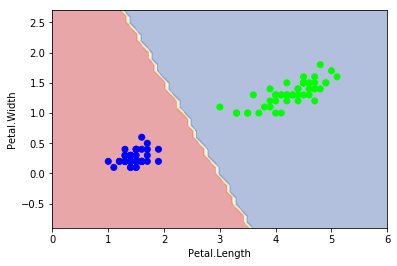

In [281]:
%pylab inline
import numpy as np
from matplotlib import pyplot as plt
plot_estimator(clf1, X,y)

Populating the interactive namespace from numpy and matplotlib


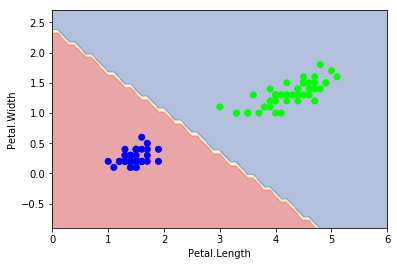

In [282]:
%pylab inline
import numpy as np
from matplotlib import pyplot as plt
plot_estimator(clf2, X,y)

### 決定正則項 C

In [283]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1], [1,1,1], [-
0.4,0.5,1],[2,5,1]])

In [284]:
X = data[:, :2]
Y = data[:,2]

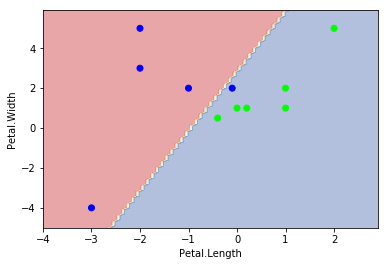

In [285]:
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

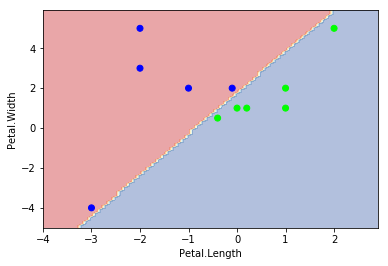

In [286]:
clf = SVC(C=10000.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

### 比較不同 Kernel

In [287]:
X = iris.data[0:100,[2,3]]
y = iris.target[0:100]

In [288]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

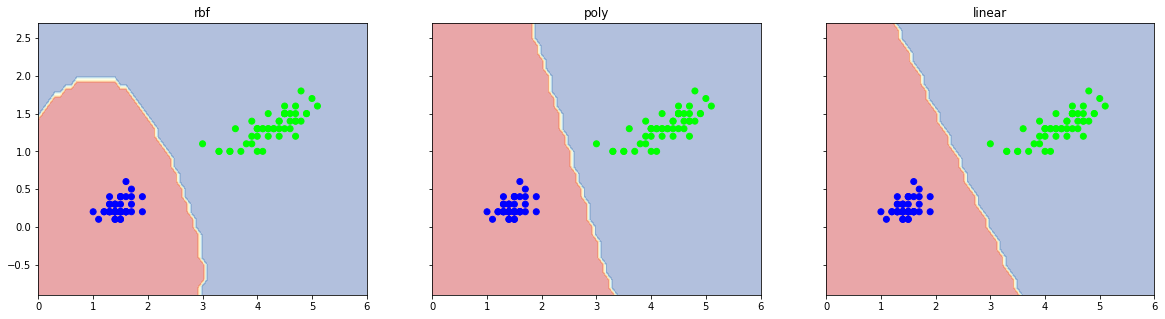

In [289]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
    axarr[idx].set_title(title)

In [290]:
X = iris.data[:,[2,3]]
y = iris.target

In [291]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

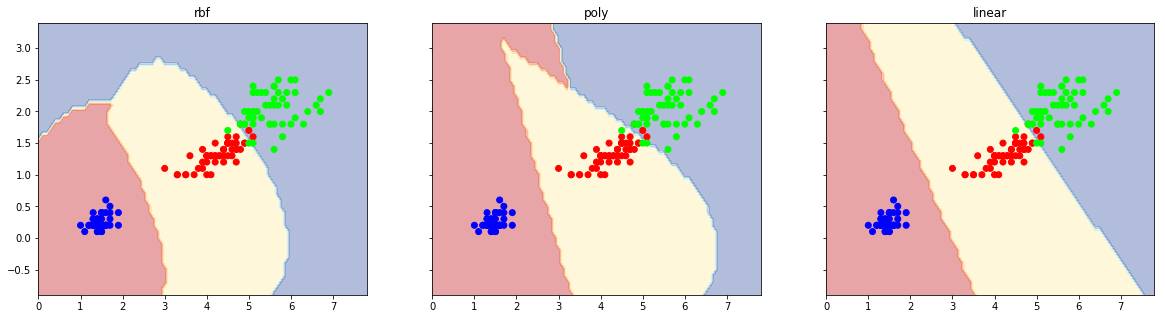

In [292]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
    axarr[idx].set_title(title)

In [293]:
predicted1 = clf1.predict(X)
accuracy_score(y, predicted1)

0.9666666666666667

In [295]:
predicted2 = clf2.predict(X)
accuracy_score(y, predicted2)

0.96

In [296]:
predicted3 = clf3.predict(X)
accuracy_score(y, predicted3)

0.9666666666666667